<a href="https://colab.research.google.com/github/megmia40/CovidExaminations/blob/main/Examining_Covid_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Access data from spreadsheets by connecting with google
# Run this code and enter a key to authenticate every session
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1heIQTJ3rS4wXnzrVXYkRIzB8u3zbvdQih5Q-F9dUY74/edit?usp=sharing')

# Importing data into a Pandas data frame
sheet = wb.worksheet('all-states-history') #change this sheet name for a new dataset
data = sheet.get_all_values()

# Storing data in dataframe
df = pd.DataFrame(data)

# Headings
df.columns = df.iloc[0]
df = df.iloc[1:]

# Printing data to check
df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
1,2021-01-16,AK,A,229,,0,,1152,1152,67,0,,,1348632,9241,,,1337142,,9,50017,,182,0,,,,,59982,7165,,0,1398649,9423,,,,,,0,1398649,9423
2,2021-01-16,AL,A,6119,5098,89,1021,38763,38763,2772,0,2483,,1686680,6552,,,,1419,,420681,334443,3153,0,,,,,,221961,,0,2021123,8910,,,96429,,2021123,8910,,0
3,2021-01-16,AR,A+,4293,3550,30,743,12686,12686,1292,88,,421,2043157,10884,,,2043157,1348,214,270178,218048,2543,0,,,,61405,,240051,,0,2261205,12593,,,,311571,,0,2261205,12593
4,2021-01-16,AS,N/A,0,,0,,,,,0,,,2140,0,,,,,,0,0,0,0,,,,,,,,0,2140,0,,,,,,0,2140,0
5,2021-01-16,AZ,A+,11248,10115,208,1133,46648,46648,4849,983,,1144,2563182,11054,,,,,821,666901,629995,8715,0,,,,,,90640,,0,5969026,56755,403762,,,,3193177,19272,5969026,56755


In [ ]:
# Extracting the most recent data as of Jan 16th
df.head()
last_day_data = df[0:56]
last_day_data.head(10)

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
1,2021-01-16,AK,A,229,,0,,1152,1152,67,0,,,1348632,9241,,,1337142,,9,50017,,182,0,,,,,59982,7165,,0,1398649,9423,,,,,,0,1398649,9423
2,2021-01-16,AL,A,6119,5098,89,1021,38763,38763,2772,0,2483,,1686680,6552,,,,1419,,420681,334443,3153,0,,,,,,221961,,0,2021123,8910,,,96429,,2021123,8910,,0
3,2021-01-16,AR,A+,4293,3550,30,743,12686,12686,1292,88,,421,2043157,10884,,,2043157,1348,214,270178,218048,2543,0,,,,61405,,240051,,0,2261205,12593,,,,311571,,0,2261205,12593
4,2021-01-16,AS,N/A,0,,0,,,,,0,,,2140,0,,,,,,0,0,0,0,,,,,,,,0,2140,0,,,,,,0,2140,0
5,2021-01-16,AZ,A+,11248,10115,208,1133,46648,46648,4849,983,,1144,2563182,11054,,,,,821,666901,629995,8715,0,,,,,,90640,,0,5969026,56755,403762,,,,3193177,19272,5969026,56755
6,2021-01-16,CA,B,32960,,669,,,,21579,0,,4846,34902009,312097,,,,,,2900246,2900246,40622,0,,,,,,,,0,37802255,352719,,,,,,0,37802255,352719
7,2021-01-16,CO,A,5363,4679,20,684,20664,20664,911,37,,,1932033,6809,276206,,,,,373483,356169,2025,0,38074,,,,,19762,4973741,36638,4973741,36638,316534,,,,2288202,8588,,0
8,2021-01-16,CT,B,6594,5355,0,1239,12257,12257,1098,0,,,4657514,0,,,,,,223422,210193,0,0,,,,,,9800,,0,4880936,0,,186893,,,,0,4867707,0
9,2021-01-16,DC,A+,847,,5,,,,280,0,,67,966955,13300,,,,,29,33537,,397,0,,,,,,23319,1000492,13697,1000492,13697,,,,,379319,2461,,0
10,2021-01-16,DE,A+,1016,910,14,106,,,441,0,,54,481791,1525,,,,,,69372,66226,645,0,,,,,71272,18851,1108131,6641,1108131,6641,,,,,551163,2170,,0


In [ ]:
# Subsetting the data to only include : "states","dataQualityGrade","death",
#"hospitalized","negative","positive","recovered","totalTestResults"

dfs = last_day_data[["state","dataQualityGrade","death","hospitalized","negative","positive","recovered","totalTestResults"]]

dfs.head()

,state,dataQualityGrade,death,hospitalized,negative,positive,recovered,totalTestResults
1,AK,A,229,1152,1348632,50017,7165,1398649
2,AL,A,6119,38763,1686680,420681,221961,2021123
3,AR,A+,4293,12686,2043157,270178,240051,2261205
4,AS,N/A,0,,2140,0,,2140
5,AZ,A+,11248,46648,2563182,666901,90640,5969026


In [ ]:
#Remove data of states (rows) with the data quality grade "D" and/or with empty values
#Store the rest of data in a new data frame

goodData = dfs[dfs.dataQualityGrade != 'D']
goodData = goodData.reset_index(drop=True)

goodData = dfs[dfs.negative != '']
goodData = goodData.reset_index(drop=True)

goodData["death"] = goodData["death"].astype(int)
goodData["negative"] = goodData["negative"].astype(int)
goodData["positive"] = goodData["positive"].astype(int)
goodData["totalTestResults"] = goodData["totalTestResults"].astype(int)

goodData.describe()


,death,negative,positive,totalTestResults
count,55.000000,5.500000e+01,5.500000e+01,5.500000e+01
mean,7027.363636,3.884410e+06,4.257738e+05,5.075726e+06
std,8385.227326,6.216741e+06,5.222350e+05,6.854085e+06
min,0.000000,2.140000e+03,0.000000e+00,2.140000e+03
25%,1544.000000,7.439245e+05,1.000785e+05,1.176639e+06
50%,4293.000000,1.977712e+06,2.859700e+05,2.919566e+06
75%,8217.500000,4.067352e+06,5.740300e+05,5.928363e+06
max,32960.000000,3.490201e+07,2.900246e+06,3.780226e+07


In [ ]:
#Finding states with cumulative death counts greater than the average 
average_death = goodData["death"].astype(float).mean()
isHighDeath = goodData['death'].astype(float) > average_death

high_death = goodData[isHighDeath]
print(high_death[['state','death']])

0  state  death
4     AZ  11248
5     CA  32960
10    FL  24380
11    GA  12291
15    IL  20020
16    IN   9287
19    LA   8080
20    MA  13583
23    MI  14669
29    NC   8016
33    NJ  20414
36    NY  32725
37    OH  10135
40    PA  19188
45    TN   8355
46    TX  31831


In [ ]:
# Creating a new column called "positivity_rate" in the dataframe "goodData" which is the ration of the values in the column "positive" by those in "goodData"
goodData['positivity_rate'] = goodData['positive'] / goodData['totalTestResults']
goodData.head()

#A conditional which says that if goodData has a positivity rate between 0 and 5%, there regulations in place are working.
for n, row_value in goodData['positivity_rate'].iteritems():
      if goodData['positivity_rate'][n] >= 0.00 and goodData['positivity_rate'][n] < 0.05: 
          print(goodData['state'][n], "has a positive covid testing rate of", round(goodData['positivity_rate'][n], 3), "and has good regulations in place already. ")
      if goodData['positivity_rate'][n] > 0.05 and goodData['positivity_rate'][n] < 0.2: 
          print(goodData['state'][n], "has a positive covid testing rate of", round(goodData['positivity_rate'][n], 3), "and needs better regulations. ")
      if goodData['positivity_rate'][n] > 0.2 and goodData['positivity_rate'][n] < 1.0: 
          print(goodData['state'][n],"has a positive covid testing rate of", round(goodData['positivity_rate'][n], 3),"and desperately needs better regulations and regulation enforcement.")

AK has a positive covid testing rate of 0.036 and has good regulations in place already. 
AL has a positive covid testing rate of 0.208 and desperately needs better regulations and regulation enforcement.
AR has a positive covid testing rate of 0.119 and needs better regulations. 
AS has a positive covid testing rate of 0.0 and has good regulations in place already. 
AZ has a positive covid testing rate of 0.112 and needs better regulations. 
CA has a positive covid testing rate of 0.077 and needs better regulations. 
CO has a positive covid testing rate of 0.075 and needs better regulations. 
CT has a positive covid testing rate of 0.046 and has good regulations in place already. 
DC has a positive covid testing rate of 0.034 and has good regulations in place already. 
DE has a positive covid testing rate of 0.063 and needs better regulations. 
FL has a positive covid testing rate of 0.087 and needs better regulations. 
GA has a positive covid testing rate of 0.115 and needs better re

In [ ]:
#Convert positivity_rate series to list
dtype_before = type(goodData['positivity_rate']) 
pos_rate = goodData['positivity_rate'].tolist()
dtype_after = type(pos_rate) 

#Count the number of states with good regulations
count_good = 0
for rate in pos_rate:
  if rate >= 0 and rate < 0.05:
    count_good += 1
print('The number of states with good regulations is', count_good,'.')

#Count the number of states that need better regulations
count_needsbetter = 0
for rate in pos_rate:
  if rate > 0.05 and rate < 0.2:
    count_needsbetter += 1
print('The number of states that need better regulations is', count_needsbetter,'.')

#Count the number of states that desperately need better regulations
count_desperate = 0
for rate in pos_rate:
  if rate > 0.2 and rate < 1:
    count_desperate += 1
print('The number of states that desperately need better regulations is', count_desperate,'.')

The number of states with good regulations is 12 .
The number of states that need better regulations is 37 .
The number of states that desperately need better regulations is 6 .


In [ ]:
#Convert state series to list
dtype_before = type(goodData['state']) 
state_list = goodData['state'].tolist()
dtype_after = type(state_list) 

#Create a series where the index is the positivity rate and the value is the state
state_and_pos_rate = pd.Series(state_list, index = pos_rate) 

#Order the series by ascending positivity rates
state_and_pos_rate.sort_index(ascending=True)

0.000000    AS
0.007291    MP
0.012442    VT
0.026811    ME
0.033521    DC
0.035761    AK
0.037989    MA
0.042444    NY
0.044958    OR
0.045774    CT
0.046579    RI
0.049137    NH
0.050564    MD
0.057113    VI
0.061435    WV
0.062603    DE
0.066055    MI
0.068417    WA
0.071646    NJ
0.072589    IL
0.073545    ND
0.074457    GU
0.075091    CO
0.076097    NM
0.076258    MN
0.076722    CA
0.079429    LA
0.083332    NC
0.087300    FL
0.089246    WY
0.090117    VA
0.091925    IN
0.094782    NE
0.095369    KY
0.097436    OH
0.098103    WI
0.101785    MT
0.104392    SC
0.111254    MO
0.111666    TN
0.111727    AZ
0.112211    NV
0.114645    GA
0.119101    OK
0.119484    AR
0.131592    UT
0.134595    TX
0.170220    MS
0.180644    PA
0.208142    AL
0.211078    IA
0.220444    PR
0.232772    KS
0.268977    ID
0.269584    SD
dtype: object

In [ ]:
#Create a list of just the states in ascending positivity rates using the series we just made
dtype_before = type(goodData['state'].sort_index(ascending=True)) 
states_ordered = state_and_pos_rate.sort_index(ascending=True).tolist()
dtype_after = type(states_ordered) 

print(states_ordered)

['AS', 'MP', 'VT', 'ME', 'DC', 'AK', 'MA', 'NY', 'OR', 'CT', 'RI', 'NH', 'MD', 'VI', 'WV', 'DE', 'MI', 'WA', 'NJ', 'IL', 'ND', 'GU', 'CO', 'NM', 'MN', 'CA', 'LA', 'NC', 'FL', 'WY', 'VA', 'IN', 'NE', 'KY', 'OH', 'WI', 'MT', 'SC', 'MO', 'TN', 'AZ', 'NV', 'GA', 'OK', 'AR', 'UT', 'TX', 'MS', 'PA', 'AL', 'IA', 'PR', 'KS', 'ID', 'SD']


In [ ]:
#Create a list of just the ascending positivity rates
pos_rate.sort()
print(pos_rate)

[0.0, 0.007290539385999886, 0.01244190015359441, 0.026811462608506156, 0.03352050791010823, 0.035760937876479375, 0.037989031514045535, 0.042444171579631235, 0.044958051984438786, 0.045774417038043524, 0.04657861699731748, 0.0491371034536063, 0.05056408673532842, 0.057112722478576135, 0.06143475412518658, 0.06260270671969288, 0.06605477942153233, 0.06841660898892372, 0.07164611972565074, 0.07258854959396333, 0.07354542360040171, 0.07445707347174393, 0.0750909627180024, 0.07609671097656971, 0.07625751207097471, 0.0767215077513233, 0.07942934993212042, 0.08333181516779639, 0.08730009152139401, 0.08924618728458271, 0.09011707280012878, 0.09192470507472839, 0.09478218591579993, 0.09536892106749675, 0.09743608294865287, 0.09810270384235519, 0.10178491627454589, 0.10439241866376656, 0.11125411114469316, 0.11166641600314639, 0.11172693836481865, 0.11221126383819557, 0.11464476790597347, 0.11910088005242721, 0.11948408039076511, 0.13159190713772942, 0.13459482885738386, 0.17021973883749097, 0.

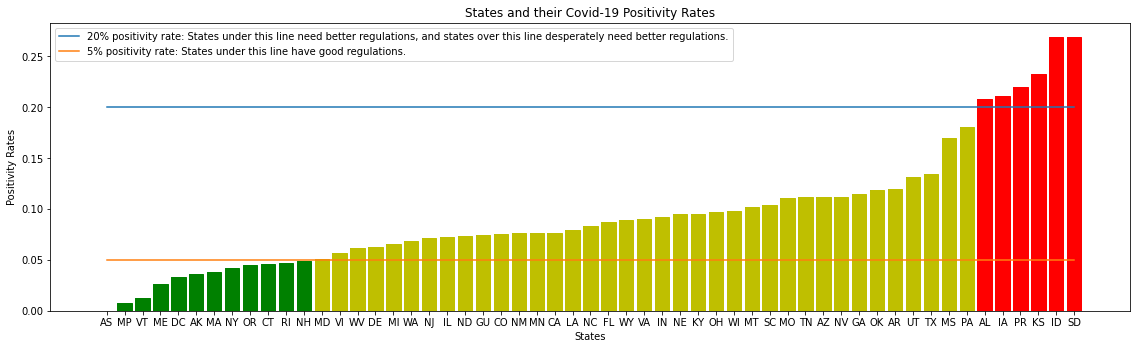

In [ ]:
#Graph the data to see the states positivity rates in ascending order on a bar graph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
States = states_ordered
PositivityRates = pos_rate
ax.bar(States, PositivityRates)

plt.title('States and their Covid-19 Positivity Rates')
plt.xlabel('States')
plt.ylabel('Positivity Rates')

#Color coding the bar plot
barlist=plt.bar(['AS', 'MP', 'VT', 'ME', 'DC', 'AK', 'MA', 'NY', 'OR', 'CT', 'RI', 'NH', 'MD', 'VI', 'WV', 'DE', 'MI', 'WA', 'NJ', 'IL', 'ND', 'GU', 'CO', 'NM', 'MN', 'CA', 'LA', 'NC', 'FL', 'WY', 'VA', 'IN', 'NE', 'KY', 'OH', 'WI', 'MT', 'SC', 'MO', 'TN', 'AZ', 'NV', 'GA', 'OK', 'AR', 'UT', 'TX', 'MS', 'PA', 'AL', 'IA', 'PR', 'KS', 'ID', 'SD'],
   [0.0, 0.007290539385999886, 0.01244190015359441, 0.026811462608506156, 0.03352050791010823, 0.035760937876479375, 0.037989031514045535, 0.042444171579631235, 0.044958051984438786, 0.045774417038043524, 0.04657861699731748, 0.0491371034536063, 0.05056408673532842, 0.057112722478576135, 0.06143475412518658, 0.06260270671969288, 0.06605477942153233, 0.06841660898892372, 0.07164611972565074, 0.07258854959396333, 0.07354542360040171, 0.07445707347174393, 0.0750909627180024, 0.07609671097656971, 0.07625751207097471, 0.0767215077513233, 0.07942934993212042, 0.08333181516779639, 0.08730009152139401, 0.08924618728458271, 0.09011707280012878, 0.09192470507472839, 0.09478218591579993, 0.09536892106749675, 0.09743608294865287, 0.09810270384235519, 0.10178491627454589, 0.10439241866376656, 0.11125411114469316, 0.11166641600314639, 0.11172693836481865, 0.11221126383819557, 0.11464476790597347, 0.11910088005242721, 0.11948408039076511, 0.13159190713772942, 0.13459482885738386, 0.17021973883749097, 0.1806439541969093, 0.20814220609037648, 0.21107835574848383, 0.22044357252958635, 0.23277185297605796, 0.26897654138689997, 0.2695841442179658])

barlist[1].set_color('g')
barlist[2].set_color('g')
barlist[3].set_color('g')
barlist[4].set_color('g')
barlist[5].set_color('g')
barlist[6].set_color('g')
barlist[7].set_color('g')
barlist[8].set_color('g')
barlist[9].set_color('g')
barlist[10].set_color('g')
barlist[11].set_color('g')

barlist[12].set_color('y')
barlist[13].set_color('y')
barlist[14].set_color('y')
barlist[15].set_color('y')
barlist[16].set_color('y')
barlist[17].set_color('y')
barlist[18].set_color('y')
barlist[19].set_color('y')
barlist[20].set_color('y')
barlist[21].set_color('y')
barlist[22].set_color('y')
barlist[23].set_color('y')
barlist[24].set_color('y')
barlist[25].set_color('y')
barlist[26].set_color('y')
barlist[27].set_color('y')
barlist[28].set_color('y')
barlist[29].set_color('y')
barlist[30].set_color('y')
barlist[31].set_color('y')
barlist[32].set_color('y')
barlist[33].set_color('y')
barlist[34].set_color('y')
barlist[35].set_color('y')
barlist[36].set_color('y')
barlist[37].set_color('y')
barlist[38].set_color('y')
barlist[39].set_color('y')
barlist[40].set_color('y')
barlist[41].set_color('y')
barlist[42].set_color('y')
barlist[43].set_color('y')
barlist[44].set_color('y')
barlist[45].set_color('y')
barlist[46].set_color('y')
barlist[47].set_color('y')
barlist[48].set_color('y')

barlist[49].set_color('r')
barlist[50].set_color('r')
barlist[51].set_color('r')
barlist[52].set_color('r')
barlist[53].set_color('r')
barlist[54].set_color('r')

#Graph lines to indicate 5% and 20% positivity rates, for reference
x_coordinates = ['AS', 'SD']
y_coordinates = [0.2, 0.2]
plt.plot(x_coordinates, y_coordinates, label = '20% positivity rate: States under this line need better regulations, and states over this line desperately need better regulations.')
x_coordinates = ['AS', 'SD']
y_coordinates = [0.05, 0.05]
plt.plot(x_coordinates, y_coordinates, label = '5% positivity rate: States under this line have good regulations.')

plt.legend()
plt.show()